# SVM Support Vector Machines
### Using libraries : $\textit{sklearn}$

## Imports

In [1]:
from utilities.std_imports import *
from sklearn import svm
import seaborn as sns; sns.set(font_scale=1.2)
import pickle

## Testing

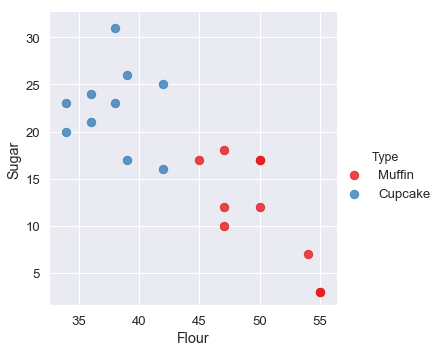

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]


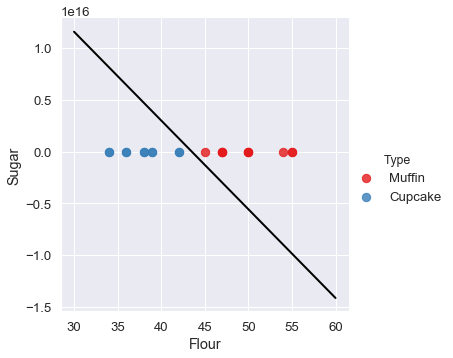

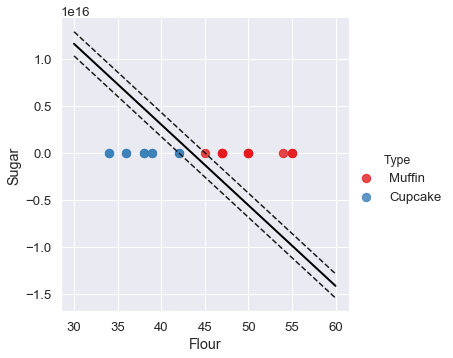

You're looking at a muffin recipe!


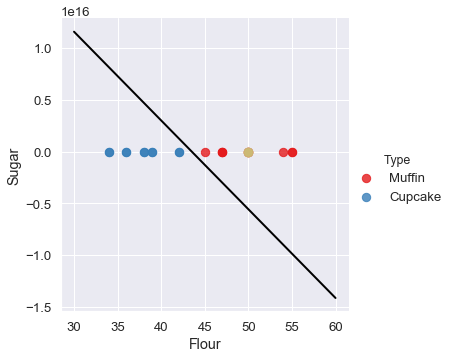

You're looking at a cupcake recipe!
{'muffin_cupcake_model': SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False), 'muffin_cupcake_features': ['Flour', 'Sugar'], 'all_features': ['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']}


b'\x80\x03}q\x00(X\x14\x00\x00\x00muffin_cupcake_modelq\x01csklearn.svm.classes\nSVC\nq\x02)\x81q\x03}q\x04(X\x17\x00\x00\x00decision_function_shapeq\x05X\x03\x00\x00\x00ovrq\x06X\x06\x00\x00\x00kernelq\x07X\x06\x00\x00\x00linearq\x08X\x06\x00\x00\x00degreeq\tK\x03X\x05\x00\x00\x00gammaq\nX\x0f\x00\x00\x00auto_deprecatedq\x0bX\x05\x00\x00\x00coef0q\x0cG\x00\x00\x00\x00\x00\x00\x00\x00X\x03\x00\x00\x00tolq\rG?PbM\xd2\xf1\xa9\xfcX\x01\x00\x00\x00Cq\x0eG?\xf0\x00\x00\x00\x00\x00\x00X\x02\x00\x00\x00nuq\x0fG\x00\x00\x00\x00\x00\x00\x00\x00X\x07\x00\x00\x00epsilonq\x10G\x00\x00\x00\x00\x00\x00\x00\x00X\t\x00\x00\x00shrinkingq\x11\x88X\x0b\x00\x00\x00probabilityq\x12\x89X\n\x00\x00\x00cache_sizeq\x13K\xc8X\x0c\x00\x00\x00class_weightq\x14NX\x07\x00\x00\x00verboseq\x15\x89X\x08\x00\x00\x00max_iterq\x16J\xff\xff\xff\xffX\x0c\x00\x00\x00random_stateq\x17NX\x07\x00\x00\x00_sparseq\x18\x89X\r\x00\x00\x00class_weight_q\x19cnumpy.core.multiarray\n_reconstruct\nq\x1acnumpy\nndarray\nq\x1bK\x00\x85q\

In [3]:
# Load Data
recipes = pd.read_csv('D:/data/csv/recipes_muffins_cupcakes.csv')
recipes


# Prepare the Data
# Plot two ingredients
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70});
plt.show()

# Specify inputs for the model
# ingredients = recipes[['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']].as_matrix()
ingredients = recipes[['Flour','Sugar']].as_matrix()
type_label = np.where(recipes['Type']=='Muffin', 0, 1)

# Feature names
recipe_features = recipes.columns.values[1:].tolist()
recipe_features


# Fit the Model
model = svm.SVC(kernel='linear')
model.fit(ingredients, type_label)

# Visualize Results

# Get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30, 60)
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# Plot the hyperplane
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');
plt.show()

# Look at the margins and support vectors
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=80, facecolors='none');
plt.show()

# Predict New Case

# Create a function to guess when a recipe is a muffin or a cupcake
def muffin_or_cupcake(flour, sugar):
    if(model.predict([[flour, sugar]]))==0: print('You\'re looking at a muffin recipe!')
    else: print('You\'re looking at a cupcake recipe!')

# Predict if 50 parts flour and 20 parts sugar
muffin_or_cupcake(50, 20)

# Plot the point to visually see where the point lies
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(50, 20, 'yo', markersize='9');
plt.show()

# Predict if 40 parts flour and 20 parts sugar
muffin_or_cupcake(40,20)

muffin_cupcake_dict = {'muffin_cupcake_model': model, 'muffin_cupcake_features': ['Flour','Sugar'], 'all_features': recipe_features}
print(muffin_cupcake_dict)

# Pickle
pickle.dump(muffin_cupcake_dict, open("muffin_cupcake_dict.p", "wb"))
pickle.dumps(muffin_cupcake_dict)
